# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-danger">
<b>Comentário geral v1: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Thaynnan! Seu projeto já está com uma qualidade excelente. Parabéns! Para prosseguirmos com a aprovação, necessitamos de alguns ajustes nas sessões: 
    

    - Ajustes no tamanho médio acumulado do pedido.
    - Ajustes  na diferença relativa do tamanho médio do pedido 
    - Calcular a receita cumulativa por grupo.  
     
Estou à disposição para qualquer dúvida!

Boa sorte!🍀
</div>

<div class="alert alert-block alert-danger">
<b>Comentário geral v2: </b> <a class="tocSkip"></a>
    
    
Oi, Thaynnan! Muito obrigada pelos ajustes! Estamos beeem próximos da aprovação! Precisamos apenas de  **ajustes no cálculo de diferença relativa na conversão cumulativa**. Adicionei comentários com o final v2 para te auxiliar na resolução. 

Estou à disposição para quaisquer dúvidas. 

Boa sorte! :) 

<div class="alert alert-block alert-success">
<b>Comentário geral v3: </b> <a class="tocSkip"></a>
    
Agora simmmmm o projeto está perfeito! Muito obrigada pelos ajustes! Está aprovado :) 

Autor : Thaynnan Aurick Silva e Souza.

Data : 23-01-2025  

# 1 Bibliotecas.

In [128]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [129]:
hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=";")
orders = pd.read_csv("/datasets/orders_us.csv")
visits = pd.read_csv("/datasets/visits_us.csv")

# 2 Carregando dados.

In [174]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [175]:
orders.head()

,transactionId,visitorId,date,revenue,group,num_items,order_size
0,3667963787,3312258926,2019-08-15,30.4,B,1,30.4
1,2804400009,3642806036,2019-08-15,15.2,B,1,15.2
2,2961555356,4069496402,2019-08-15,10.2,A,1,10.2
3,3797467345,1196621759,2019-08-15,155.1,B,1,155.1
4,2282983706,2322279887,2019-08-15,40.5,B,1,40.5


In [132]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [133]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Ao analisar os dados percebi que na coluna que as colunas não estão padronizadas com letras minusculas.

In [134]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


Ao analisar os dados percebi que na coluna "date" o tipo está como "object" quando devia estar como "datetime".

In [135]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Ao analisar os dados percebi que na coluna "date" o tipo está como "object" quando devia estar como "datetime".

<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

- Os dados foram processados corretamente
- Sugestão: Analisar possíveis dados nulos e duplicados para enriquecer ainda mais a análise de dados

</div>

# 3 Fazendo ajustes nos dados.

In [136]:
hypotheses.columns = hypotheses.columns.str.lower()

In [137]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [138]:
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d %H:%M")

In [139]:
orders.info()#sanity Check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [140]:
visits['date'] = pd.to_datetime(visits['date'], format="%Y-%m-%d %H:%M")

In [141]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [142]:
# 1. Verificar duplicatas
duplicates = orders[orders.duplicated(subset=['visitorId', 'group'], keep=False)]


# 2. Remover duplicatas, mantendo apenas a primeira ocorrência
duplicates = orders[orders.duplicated(subset=['visitorId', 'group'], keep=False)]
orders_unique = orders.drop_duplicates(subset=['visitorId', 'group'])

# 3. Verificar se algum visitante está em mais de um grupo
visitor_group_counts = orders_unique['visitorId'].value_counts()
filtered_visitors = visitor_group_counts[visitor_group_counts > 1]

# 4. Se houver visitantes em mais de um grupo, vamos resolver isso
if not filtered_visitors.empty:
    # Para cada visitante em conflito, vamos manter apenas a primeira ocorrência
    orders_drop = orders[~orders['visitorId'].isin(filtered_visitors.index)]
    

duplicates = orders_drop[orders_drop.duplicated(subset=['visitorId', 'group'], keep=False)]
orders_unique = orders_drop.drop_duplicates(subset=['visitorId', 'group'])
    
# 5. Verificar novamente se algum visitante está em mais de um grupo
visitor_group_counts = orders_unique['visitorId'].value_counts()
filtered_visitors = visitor_group_counts[visitor_group_counts > 1]



print("\nVisitantes em mais de um grupo após a remoção:")
print(filtered_visitors)


Visitantes em mais de um grupo após a remoção:
Series([], Name: visitorId, dtype: int64)


In [143]:
orders_unique #Sanity check

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


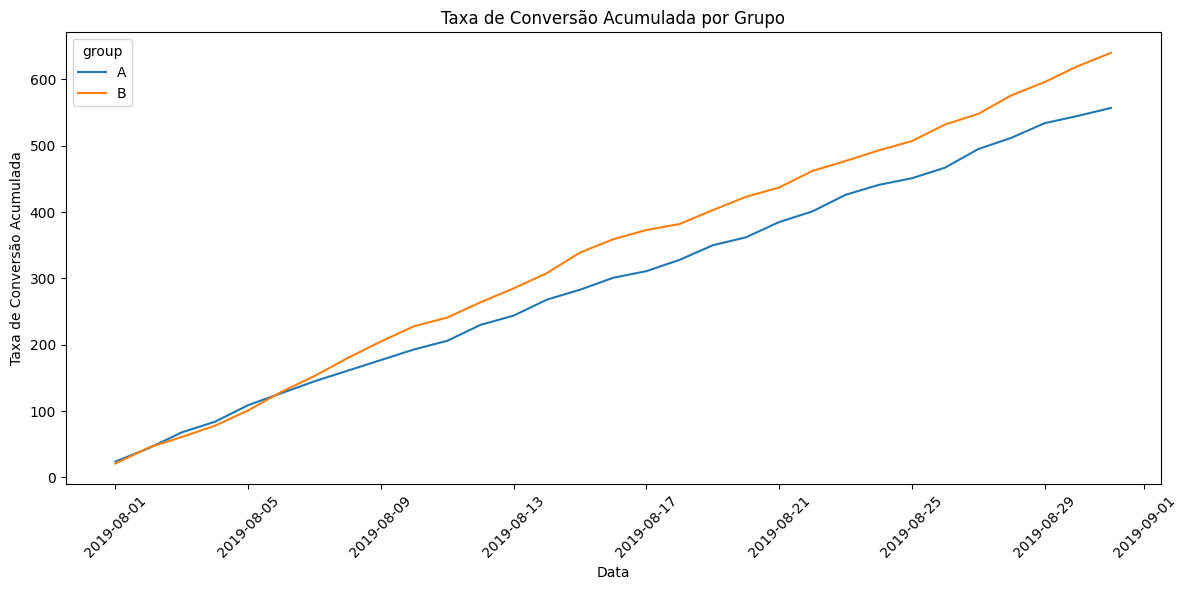

In [176]:
orders_g = orders.groupby(['group', 'date']).agg({'transactionId' : 'count', 'revenue' : 'sum'}).reset_index()
visits_g = visits.groupby(['group', 'date'])['visits'].sum()

df_final = pd.merge(orders_g, visits_g, on = ['group', 'date'], how = 'outer').rename(columns = {'transactionId' : 'num_transactions'})

df_final.sort_values(by = 'date', inplace = True)
df_final['revenue_acc'] = df_final.groupby('group')['revenue'].cumsum()
df_final['visits_acc'] = df_final.groupby('group')['visits'].cumsum()
df_final['num_transactions_acc'] = df_final.groupby('group')['num_transactions'].cumsum()


# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='num_transactions_acc', hue='group', data=df_final)
plt.title('Taxa de Conversão Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão Acumulada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [145]:
visits_grouped = orders['visitorId'].value_counts()

# 4 Priorizando Hipóteses

In [146]:
hypotheses['ICE'] = hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort'] 
print(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [147]:
hypotheses['RICE'] = hypotheses['reach']* hypotheses['impact']* hypotheses['confidence']/ hypotheses['effort']
print(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


* Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.

In [148]:
top_hypoteses_ICE = hypotheses.nlargest(5, 'ICE')
top_hypoteses_ICE.head()

,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0


In [149]:
top_hypoteses_RICE = hypotheses.nlargest(5, 'RICE')
top_hypoteses_RICE.head()

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


E possivel notar uma grande diferença nos resultados ja que o calculo de RICE tambem prioriza o alcance em seus calculos.

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
RICE e ICE calculados com sucesso. 


# 5 Analisando grupos A/B

* 5.1 Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas. 

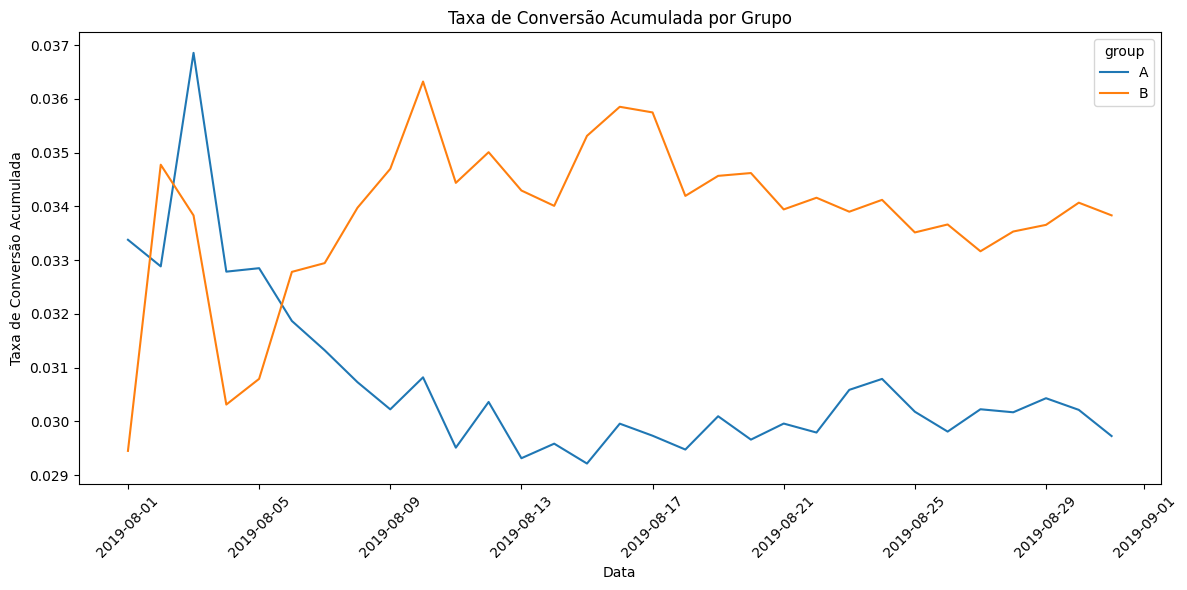

In [177]:
# Criando novas colunas de valores acumuldos.
df_final.sort_values(by = 'date', inplace = True)
df_final['revenue_acc'] = df_final.groupby('group')['revenue'].cumsum()
df_final['visits_acc'] = df_final.groupby('group')['visits'].cumsum()
df_final['num_transactions_acc'] = df_final.groupby('group')['num_transactions'].cumsum()

df_final['conversion_acc'] = df_final['num_transactions_acc'] / df_final['visits_acc']

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='conversion_acc', hue='group', data=df_final)
plt.title('Taxa de Conversão Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão Acumulada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusões: O grafíco aponta que a uma superior do grupo B em detrerimento do grupo A.

* 5.2 Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.

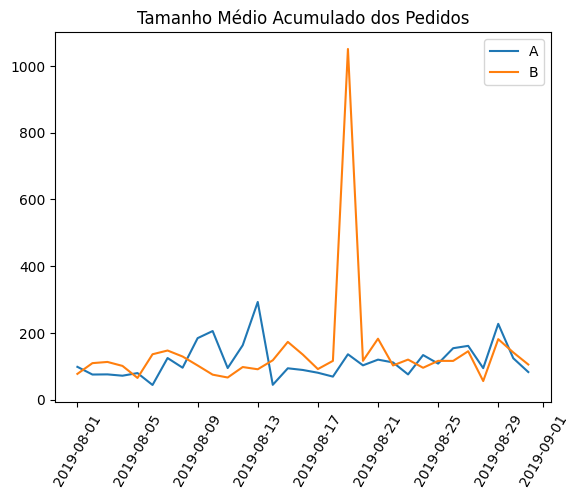

In [172]:
import matplotlib.pyplot as plt

# Junta os dados agregados de pedidos com os dados agregados de visitantes
cumulativeData = orders_data.merge(
    visitas_data, left_on=['date', 'group'], right_on=['date', 'group']
)

# Seleciona os dados acumulados para o grupo A, incluindo data, receita e pedidos
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'Receita', 'Qtde Vendas']]

# Seleciona os dados acumulados para o grupo B, incluindo data, receita e pedidos
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'Receita', 'Qtde Vendas']]

# Plota o tamanho médio acumulado do pedido para o grupo A
plt.plot(cumulativeRevenueA['date'], (cumulativeRevenueA['Receita'] / cumulativeRevenueA['Qtde Vendas']), label='A')

# Plota o tamanho médio acumulado do pedido para o grupo B
plt.plot(cumulativeRevenueB['date'], (cumulativeRevenueB['Receita'] / cumulativeRevenueB['Qtde Vendas']), label='B')

# Adiciona uma legenda para identificar as linhas dos grupos
plt.legend()

# Define o título do gráfico
plt.title('Tamanho Médio Acumulado dos Pedidos')

# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=60)

# Exibe o gráfico
plt.show(block=False)

<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
    
O tamanho médio acumulado do pedido também deve ser analisado conforme o tempo (semelhante ao gráfico anterior).

Exemplo:
    
```python
import matplotlib.pyplot as plt

# Junta os dados agregados de pedidos com os dados agregados de visitantes
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# Seleciona os dados acumulados para o grupo A, incluindo data, receita e pedidos
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# Seleciona os dados acumulados para o grupo B, incluindo data, receita e pedidos
cumulativeRevenueB = ...continue o código

# Plota o tamanho médio acumulado do pedido para o grupo A
plt.plot(cumulativeRevenueA['date'], (cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders']), label='A')

# Plota o tamanho médio acumulado do pedido para o grupo B (faça o mesmo para o grupo B)
...continue o código

# Adiciona uma legenda para identificar as linhas dos grupos
plt.legend()

# Define o título do gráfico
plt.title('Tamanho Médio Acumulado dos Pedidos')

# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=60)

# Exibe o gráfico
plt.show(block=False)
```

Conclusões: O grafíco aponta que o grupo B teve o tamanho médio de pedidos maior que o dobro se comparado com o grupo A.

* 5.3 Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A

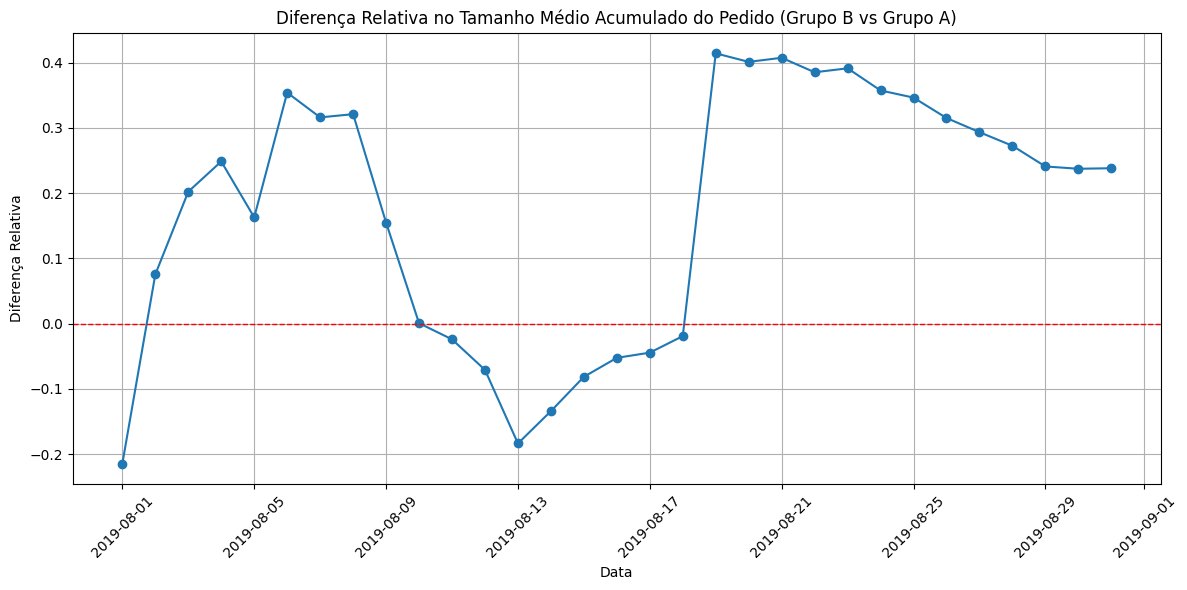

In [155]:
# Calcular o número de itens por pedido usando 'transactionId'
orders['num_items'] = orders.groupby('transactionId')['transactionId'].transform('count')

# Calcular o tamanho médio do pedido por data e grupo
orders['order_size'] = orders['revenue'] / orders['num_items']
cumulative_average_order_size = orders.groupby(['group', 'date'])['order_size'].mean().groupby(level=0).cumsum().reset_index()

# Adicionar colunas para o gráfico
cumulative_average_order_size_pivot = cumulative_average_order_size.pivot(index='date', columns='group', values='order_size').fillna(0)

# Calcular a diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A
cumulative_average_order_size_pivot['relative_difference'] = (
    (cumulative_average_order_size_pivot['B'] - cumulative_average_order_size_pivot['A']) / cumulative_average_order_size_pivot['A']
)

# Fazer o gráfico da diferença relativa no tamanho médio acumulado do pedido
# Configurar o gráfico
plt.figure(figsize=(12, 6))

# Plotar a diferença relativa
plt.plot(cumulative_average_order_size_pivot.index, cumulative_average_order_size_pivot['relative_difference'], marker='o', linestyle='-')

# Adicionar título e rótulos
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Linha horizontal em y=0 para referência

# Formatar o eixo x para mostrar as datas corretamente
plt.xticks(rotation=45)
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
<s>    
- A diferença relativa do tamanho médio do pedido necessita de ajustes. Segue um tutorial abaixo de como resolver: 
    
```python
# Calcular o número de itens por pedido usando 'transactionId'
orders['num_items'] = orders.groupby('transactionId')['transactionId'].transform('count')

# Calcular o tamanho médio do pedido por data e grupo
orders['order_size'] = orders['revenue'] / orders['num_items']
cumulative_average_order_size = orders.groupby(['group', 'date'])['order_size'].mean().groupby(level=0).cumsum().reset_index()

# Adicionar colunas para o gráfico
cumulative_average_order_size_pivot = cumulative_average_order_size.pivot(index='date', columns='group', values='order_size').fillna(0)

# Calcular a diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A
cumulative_average_order_size_pivot['relative_difference'] = (
    (cumulative_average_order_size_pivot['B'] - cumulative_average_order_size_pivot['A']) / cumulative_average_order_size_pivot['A']
)

# Fazer o gráfico da diferença relativa no tamanho médio acumulado do pedido
...continue o código
```

O output esperado é esse: 
![image.png](attachment:image.png)
</div>

Conclusões: Podemos notar que a diferença do tamanho medio acumulado do grupo B em comparação ao grupo A e de aproximadamente 120%

5.4 Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.

<AxesSubplot:xlabel='date', ylabel='conversion_rate'>

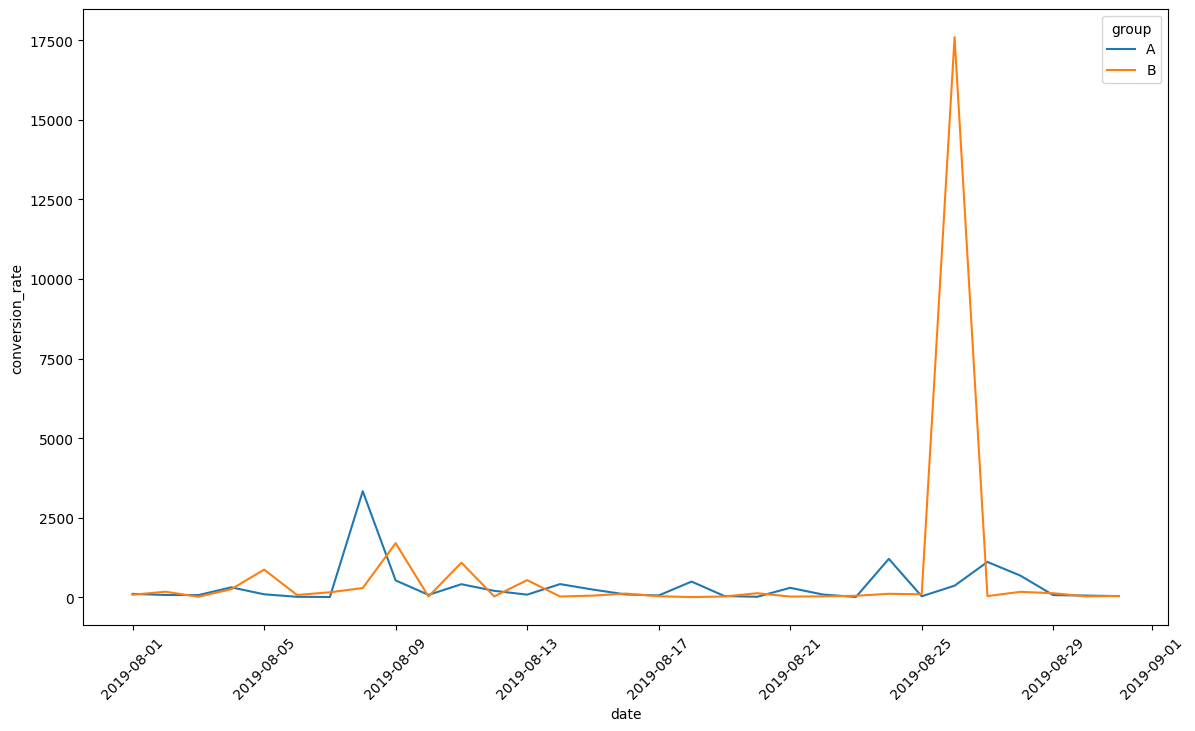

In [173]:
# Calculando a taxa de conversão
df_final['conversion_acc'] = (orders['transactionId'] / orders['visitorId']) * 100
plt.figure(figsize=(14, 8))
plt.xticks(rotation=45)
sns.lineplot(x = 'date', y = 'conversion_rate', hue = 'group', data = dataframe)

Conclusões: Foi noatado que há alguns resultados com valores anormais, ja que a maior parte de seus resultados se encontram abaixo de 2500 pontos na taxa de conversão.

* 5.5 Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões.

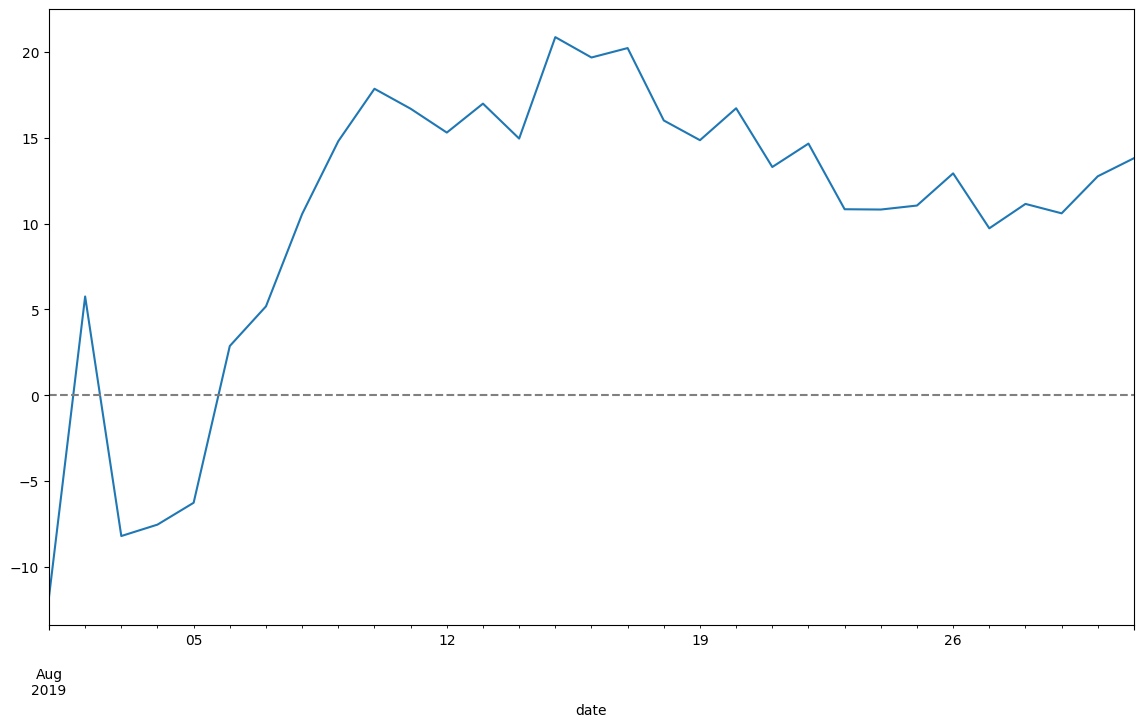

In [165]:
# Criando coluna de converção acumulda.
df_final['conversion_acc'] = df_final['num_transactions_acc'] / df_final['visits_acc']

# Criando pivot table.
df_pivot = df_final.pivot_table(index = 'date', columns = 'group', values = 'conversion_acc', aggfunc='sum')
df_pivot['conversion_diff'] = 100 * (df_pivot['B'] - df_pivot['A']) / df_pivot['A']

# Plotando Gráfico.
plt.figure(figsize=(14, 8))
ax = df_pivot['conversion_diff'].plot()
ax.axhline(0, ls = '--', color = 'gray');

<div class="alert alert-block alert-danger">
<b> Comentário v2: </b> <a class="tocSkip"></a>
    
São necessários ajustes no cálculo de diferença relativa na conversão cumulativa. Segue abaixo um tutorial mais detalhado da resolução: 
    
    
```python
# Cálculo da taxa de conversão cumulativa por grupo
orders_date_group = df_orders.groupby(['date', 'group']).agg({'transaction_id': 'count'}).rename(columns={'transaction_id': 'orders'})
visits_date_group = df_visits.groupby(['date', 'group']).agg({'visits': 'sum'})

# Juntando as duas tabelas
cumulative_data = orders_date_group.join(visits_date_group).reset_index()

# Criando coluna de taxa de conversão
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visits']

# Separando os dados por grupo e calculando a conversão cumulativa para cada data
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A'].sort_values(by='date').copy()
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B'].sort_values(by='date').copy()

cumulative_data_A['cumulative_conversion'] = cumulative_data_A['conversion'].cumsum()
cumulative_data_B['cumulative_conversion'] = cumulative_data_B['conversion'].cumsum()

# Calculando a diferença relativa entre as conversões cumulativas dos grupos B e A
relative_difference = ((cumulative_data_B['cumulative_conversion'].values - 
                        cumulative_data_A['cumulative_conversion'].values) / 
                        cumulative_data_A['cumulative_conversion'].values) * 100



# Plotando os gráficos
plt.figure(figsize=(14, 8))

# Conversões cumulativas para o grupo A e B
plt.plot(cumulative_data_A['date'], cumulative_data_A['cumulative_conversion'], label='Grupo A', color='blue')
plt.plot(cumulative_data_B['date'], cumulative_data_B['cumulative_conversion'], label='Grupo B', color='red')


# Diferença relativa entre os grupos
plt.plot(cumulative_data_A['date'], relative_difference, label='Diferença Relativa (B vs A)', color='blue', linestyle='--')

# Configurações do gráfico
plt.xlabel('Data')
... continue o código
```

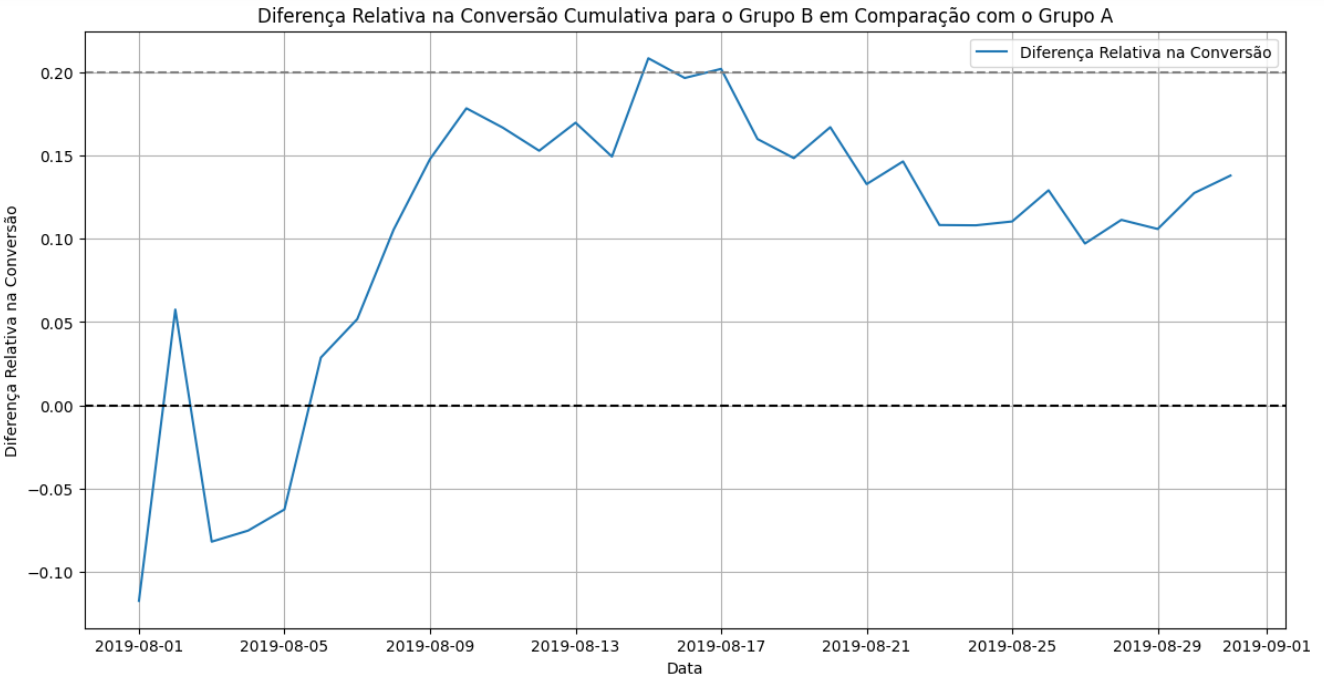

<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>

Pendência: 
    
É necessário calcular a receita cumulativa por grupo.
É esperado um gráfico semelhante a esse: 
  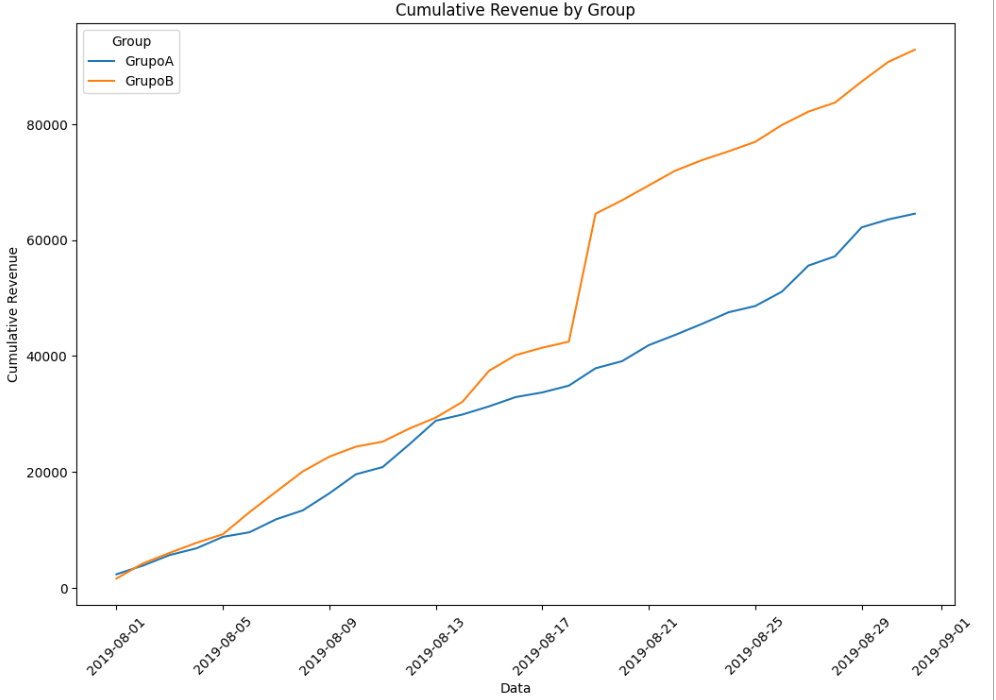  

</div>

Conclusões: Se ignorarmos os valores atipicos podemos que na maioria dos casos o grupo B tem uma diferença relativa de conversão positiva se comparada com o grupo A

* 5.6 Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [158]:
percentile_95 = orders['transactionId'].quantile(0.95)
percentile_99 = orders['transactionId'].quantile(0.99)

# Definindo o ponto de anomalia
anomaly_threshold_95 = percentile_95
anomaly_threshold_99 = percentile_99

# Exibindo os resultados
print(f'Percentil 95: {percentile_95}')
print(f'Percentil 99: {percentile_99}')
print(f'Ponto de anomalia (95%): {anomaly_threshold_95}')
print(f'Ponto de anomalia (99%): {anomaly_threshold_99}')

Percentil 95: 4067471456.2
Percentil 99: 4239148157.3199997
Ponto de anomalia (95%): 4067471456.2
Ponto de anomalia (99%): 4239148157.3199997


Conclusções: Os ponto que os resultados se tornam anomalias está acima do valor de 406 que representa 95% dos valores encontrados.

* 5.7 Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.

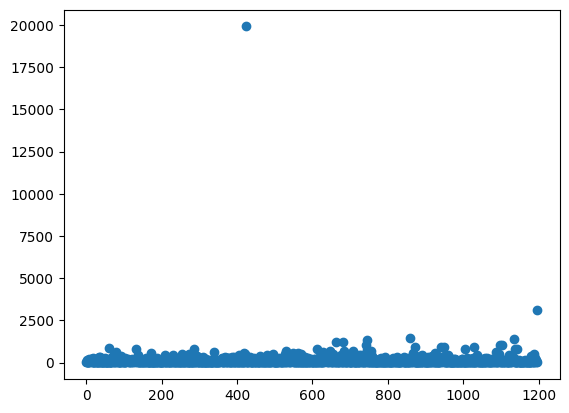

In [159]:
# Exibindo gráfico de dispersão.
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Conclusões: E possivel destacar os valores que excedem a média da receita que esta abaixo de 2500.

* 5.8 Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [160]:
# Exibindo resultados de porcentagens.
print(np.percentile(orders['revenue'], [90, 95, 99]))

[282.48  435.54  900.904]


Conclusões: O valor se torna uma anomalia acima do valor de 435.54 que representa menos ate 5% dos valores normais. 

* 5.9 Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

In [161]:
# Sepandos grupos e filtrando valores unicos.
ordersByUsersA = (
    orders[orders['group']== 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)

ordersByUsersA.columns = ['visitorId', 'orders']

# Sepandos grupos e filtrando valores unicos.
ordersByUsersB = (
    orders[orders['group']== 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Concatenando amostra A.
sampleA = pd.concat(
    [
        ordersByUsersA['orders']
        ,pd.Series(
            0,
            index=np.arange(
                visits[visits['group']== 'A']['visits'].sum() 
                - len(ordersByUsersA['orders'])
            ),
            name='orders',),
    ], 
    axis=0,
)

# Concatenando amostra B.
sampleB = pd.concat(
    [
        ordersByUsersB['orders']
        ,pd.Series(
            0,
            index=np.arange(
                visits[visits['group']== 'B']['visits'].sum() 
                - len(ordersByUsersB['orders'])
            ),
            name='orders',),
    ], 
    axis=0,
)
                     
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01679
0.138


Conclusões: com base nos dados brutos, não existe diferença entre os grupos A e B.

* 5.10 Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

In [162]:
# Buscando signifância estatística do tamanho médio do pedido entre A para B. 
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# Buscando signifância estatística do tamanho médio do pedido entre A para B.
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


Conclusões: O valor-p é consideravelmente maior do que 0.05, então não há motivo para rejeitar a hipótese nula.

* 5.11 Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.

In [163]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1206]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1206]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 435.54]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01872
0.140


Conclusões: Os valores de conversãos permecem proximos com a primeira amostra bruta.

* 5.12 Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.

In [164]:
# Buscando valor da significância entre A e B.
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
# Buscando valor médio da significância entre A e B.
print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.823
-0.013


<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
    
Ambos os testes de hipótese foram realizados corretamente!

Conclusões: Ambos os valores de p indicam que a diferença no tamanho médio do pedido entre os grupos não é estatisticamente significativa.

* 5.13 Tome uma decisão com base nos resultados do teste. As decisões possíveis são: 1. Pare o teste, considere um dos grupos o líder. 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.

# Conclusões finais: Como não foi comprovador uma diferença significativa entre os valores dos grupos por isso devemos parar o teste e concluir que nao há diferenças entre os grupos.